In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Task 1:
## Implement the Adam (Mini-Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [4]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',') 
x = data[:,:-1] 
y = data[:,-1].reshape(len(x),1)
print(f"Data shape: {data.shape}, Independent Variable shape: {x.shape}, target variable shape: {y.shape} ")

Data shape: (25, 4), Independent Variable shape: (25, 3), target variable shape: (25, 1) 


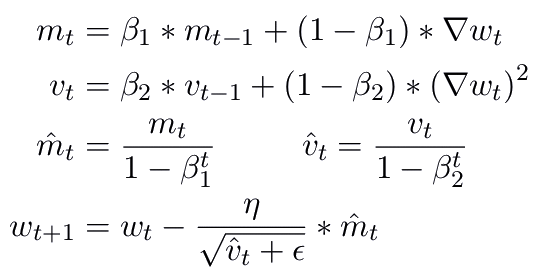

In [141]:
def Adam_Multivar(x, y, alpha, beta_m, beta_v, Eps, batch_size, max_epoch):
    
    m = len(x)
    no_batches = m // batch_size
    X = np.concatenate((np.ones(m).reshape(m,1),x),axis=1) #(25,4)
    m_vec = np.zeros((X.shape[1],1))
    v_vec = np.zeros((X.shape[1],1))
    theta_vec = np.zeros((X.shape[1],1)) #(4,1)
    

    loss = []
    loss_per_ecpoch = []
    thetas = []
    
    for ep_num in range(max_epoch):

        for b in range(no_batches):
            
            thetas.append(theta_vec)
            
            mini_batch_X = X[b * batch_size : (b + 1)*batch_size] #(batch_size,n)
            mini_batch_y = y[b * batch_size : (b + 1)*batch_size] #(batch_size,n)

            h_x = mini_batch_X @ theta_vec #(m,n)*(n,1)=(m,1)
            e = h_x - mini_batch_y #(m,1)
            J = (e.T@e) / (2*batch_size)
            loss.append(J[0][0])

            #find partial derivative of loss func.
            grad_vec = (mini_batch_X.T@e)/batch_size #(4,25)*(25*1)=(4,1)  
            
            m_vec = beta_m*(m_vec) + (1-beta_m)*(grad_vec)
            v_vec = beta_v*(v_vec) + (1-beta_v)*(grad_vec)**2
            
            # Compute bias-corrected first and second moment estimates
            m_bias = m_vec/(1-beta_m**(b+1))
            v_bias = v_vec/(1-beta_v**(b+1))
            
            #update thetas
            
            v_bias_sprt = np.sqrt(v_bias)+Eps
            alpha_m_bias = alpha*(m_bias)
            
            theta_vec = theta_vec - np.divide(alpha_m_bias,v_bias_sprt)
            

        loss_per_ecpoch.append(J[0][0])
        grad_vec_norm = np.linalg.norm(grad_vec)
        
        if (ep_num > 0) and (abs(loss_per_ecpoch[-1] - loss_per_ecpoch[-2]) < 0.001 or grad_vec_norm < 0.001):
            break
   
    print("********************* Training Report *************************\n")
    print(f'Gradient Descent converged after {ep_num} epochs\n')
    print(f'optimal thetas:{theta_vec}\n')
    print('cost=',J,'\n')
    print('Gradient Vector Norm:',grad_vec_norm)
    return theta_vec, thetas, loss, ep_num, grad_vec_norm

In [162]:
adam_theta_vec, thetas, adam_loss, adam_epoch_no, adam_norm = Adam_Multivar(x, y, alpha=0.01, beta_m=0.9, beta_v=0.99, Eps=1e-08, batch_size=5, max_epoch=500)

********************* Training Report *************************

Gradient Descent converged after 38 epochs

optimal thetas:[[0.67607842]
 [0.67090056]
 [0.66977989]
 [0.67646645]]

cost= [[12.92130467]] 

Gradient Vector Norm: 228.1737701661478


In [111]:
m = len(x)
X = np.concatenate((np.ones(m).reshape(m,1),x),axis=1)
y_pred = X@theta_vec
adam_r2 = r2_score(y,y_pred)
print('r2_score = ',adam_r2)

r2_score =  0.9786440682052948


In [31]:
def optain_thetas_list(thetas):
    
    theta_0 = []
    theta_1 = []
    theta_2 = []
    theta_3 = []

    for i in np.arange(len(thetas)):
        th0 = thetas[i][0][0]
        theta_0.append(th0)

        th1 = thetas[i][1][0]
        theta_1.append(th1)

        th2 = thetas[i][2][0]
        theta_2.append(th2)

        th3 = thetas[i][3][0]
        theta_3.append(th3)
    return  theta_0, theta_1, theta_2, theta_3

In [33]:
# plots function

def plots(loss, theta_0, theta_1, theta_2, theta_3, X, y):
    from sklearn.metrics import r2_score
    y_pred = X@theta_vec
    print('r2_score = ',r2_score(y,y_pred))
    fig, ax = plt.subplots(5,1,figsize=(8,25))

    #loss vs. Epochs
    ax[0].set_title('loss vs. Epochs')
    ax[0].plot(loss,"o-",markersize=5)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')


    #loss vs. Theta_0
    ax[1].set_title('loss vs. Theta_0')
    ax[1].plot(theta_0,loss,"o-",markersize=5)
    ax[1].set_xlabel('Theta_0')
    ax[1].set_ylabel('Loss')

    #loss vs. Theta_1
    ax[2].set_title('loss vs. Theta_1')
    ax[2].plot(theta_1,loss,"o-",markersize=5)
    ax[2].set_xlabel('Theta_1')
    ax[2].set_ylabel('Loss')
    
    #loss vs. Theta_2
    ax[3].set_title('loss vs. Theta_2')
    ax[3].plot(theta_2,loss,"o-",markersize=5)
    ax[3].set_xlabel('Theta_2')
    ax[3].set_ylabel('Loss')
    
    #loss vs. Theta_3
    ax[4].set_title('loss vs. Theta_3')
    ax[4].plot(theta_3,loss,"o-",markersize=5)
    ax[4].set_xlabel('Theta_3')
    ax[4].set_ylabel('Loss')

    plt.show()

r2_score =  0.978410871987474


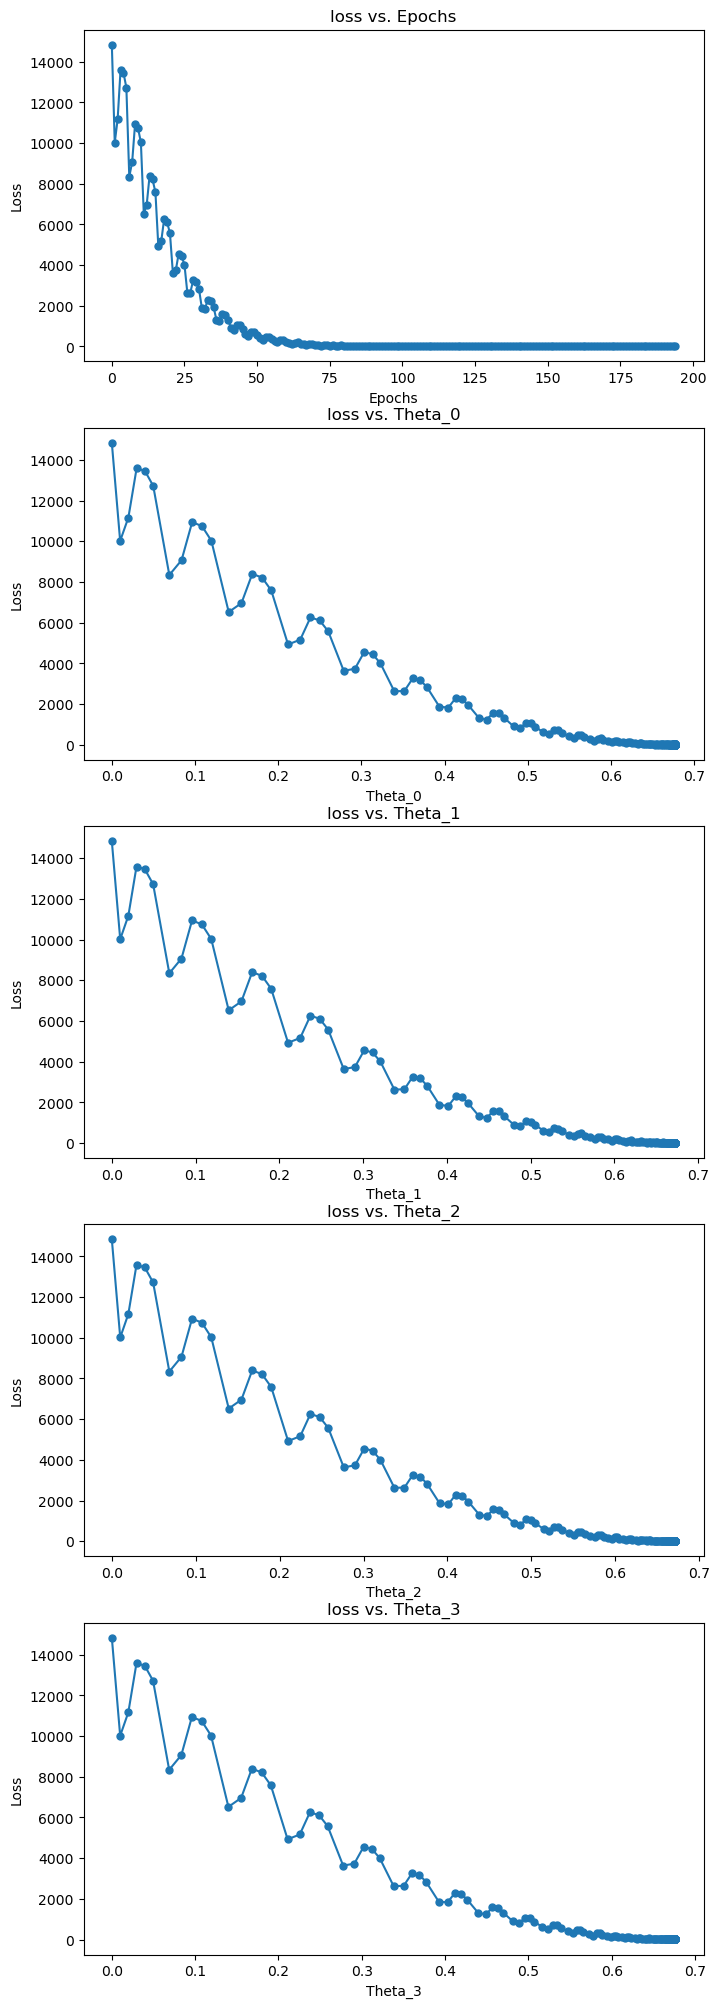

In [124]:
theta_0, theta_1, theta_2, theta_3 = optain_thetas_list(thetas)
plots(loss, theta_0, theta_1, theta_2, theta_3, X, y)

# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

<font color='red'><b><b><i>Notes:</i></b></font>
    
<font color='red'><b><b><i>You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b></font>

<font color='red'><b><i>Any copied code from the internet will be considered as cheeeting</i></b></i></b></font>

<font color='red'><b><i>Any code exchange between trainees will be considered as cheeeting</i></b></font>

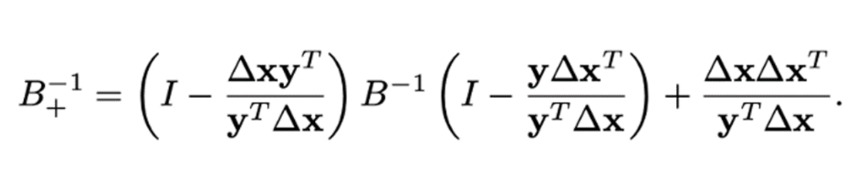

In [166]:
def BFGS_Multivar(theta_init, theta_old, x, y, alpha, batch_size, max_epoch):
    
    m = len(x)
    no_batches = m // batch_size

    X = np.concatenate((np.ones(m).reshape(m,1),x),axis=1) #(25,4)
    B = np.identity(X.shape[1]) # initial Hessian matrix

    loss = []
    loss_per_epoch = []
    thetas = []
    
    # Gradinet function of loss function
    def mse_gradient(X, y, theta):
        m = len(y)
        grad = (1/m) * X.T.dot(X.dot(theta) - y)
        return grad

    for ep_num in range(max_epoch):

        for b in range(no_batches):

            mini_batch_X = X[b * batch_size : (b + 1)*batch_size] #(batch_size,n)
            mini_batch_y = y[b * batch_size : (b + 1)*batch_size] #(batch_size,n)

            grad = mse_gradient(mini_batch_X,mini_batch_y,theta_init)
            grad_old = mse_gradient(mini_batch_X,mini_batch_y,theta_old)

            # Difference between gradients
            delta_grad =  grad - grad_old 
            # Difference between initial and old theta
            delta_theta = theta_init - theta_old 


            # Calculate inverse Hessian approximation
            rho = 1 / (delta_grad.T@delta_theta + 1e-8) 
            I = np.identity(X.shape[1]) # identity matrix
            A = I - (delta_theta@delta_grad.T) * rho 
            C = A@B
            A_1 = I - (delta_grad@delta_theta.T)/(delta_grad.T@delta_theta)
            E = (delta_theta@delta_theta.T)/(delta_grad.T@delta_theta)
            B = C@A_1 + E

            # Update theta and gradient 
            theta_new = theta_init - alpha*np.dot(B, grad)
            thetas.append(theta_new)
            grad_new = mse_gradient(mini_batch_X, mini_batch_y, theta_new)

            # Calculate loss function
            h_x = mini_batch_X @ theta_new
            e = h_x - mini_batch_y
            J = (np.vdot(e,e)) / (2*batch_size)
            loss.append(J)

            # Update variables
            theta_old = theta_init
            theta_init = theta_new
            grad_old = grad
            grad = grad_new   

        
        loss_per_epoch.append(J)
        grad_vec_norm = np.linalg.norm(grad_new)

        if (ep_num > 0) and (abs(loss_per_epoch[(-1)] - loss_per_epoch[-2]) < 0.001 or grad_vec_norm < 0.001):
            break

    print("********************* Training Report *************************\n")
    print(f'Gradient Descent converged after {ep_num} epochs\n')
    print(f'optimal thetas:{theta_new}\n')
    print('cost=',J,'\n')
    print('Gradient Vector Norm:',grad_vec_norm)
    
    return theta_new, thetas, loss, ep_num, grad_vec_norm

In [167]:
max_epoch = 500
batch_size = 5
alpha = 0.01
theta_init = np.full((X.shape[1],1),3) 
theta_old = np.full((X.shape[1],1),4)

BFGS_theta_vec, thetas, BFGS_loss, BFGS_epoch_no, BFGS_norm = BFGS_Multivar(theta_init, theta_old, x, y, alpha, batch_size, max_epoch)

********************* Training Report *************************

Gradient Descent converged after 161 epochs

optimal thetas:[[-1.46999006]
 [ 0.22097913]
 [ 0.55397987]
 [ 1.26070613]]

cost= 4.1958686719973 

Gradient Vector Norm: 129.44137893377194


In [160]:
m = len(x)
X = np.concatenate((np.ones(m).reshape(m,1),x),axis=1)
y_pred = X@theta_vec
BFGS_r2 = r2_score(y,y_pred)
print('r2_score = ',BFGS_r2)

r2_score =  0.9784108719874762


In [127]:
theta_0, theta_1, theta_2, theta_3 = optain_thetas_list(thetas)

r2_score =  0.9877836946937719


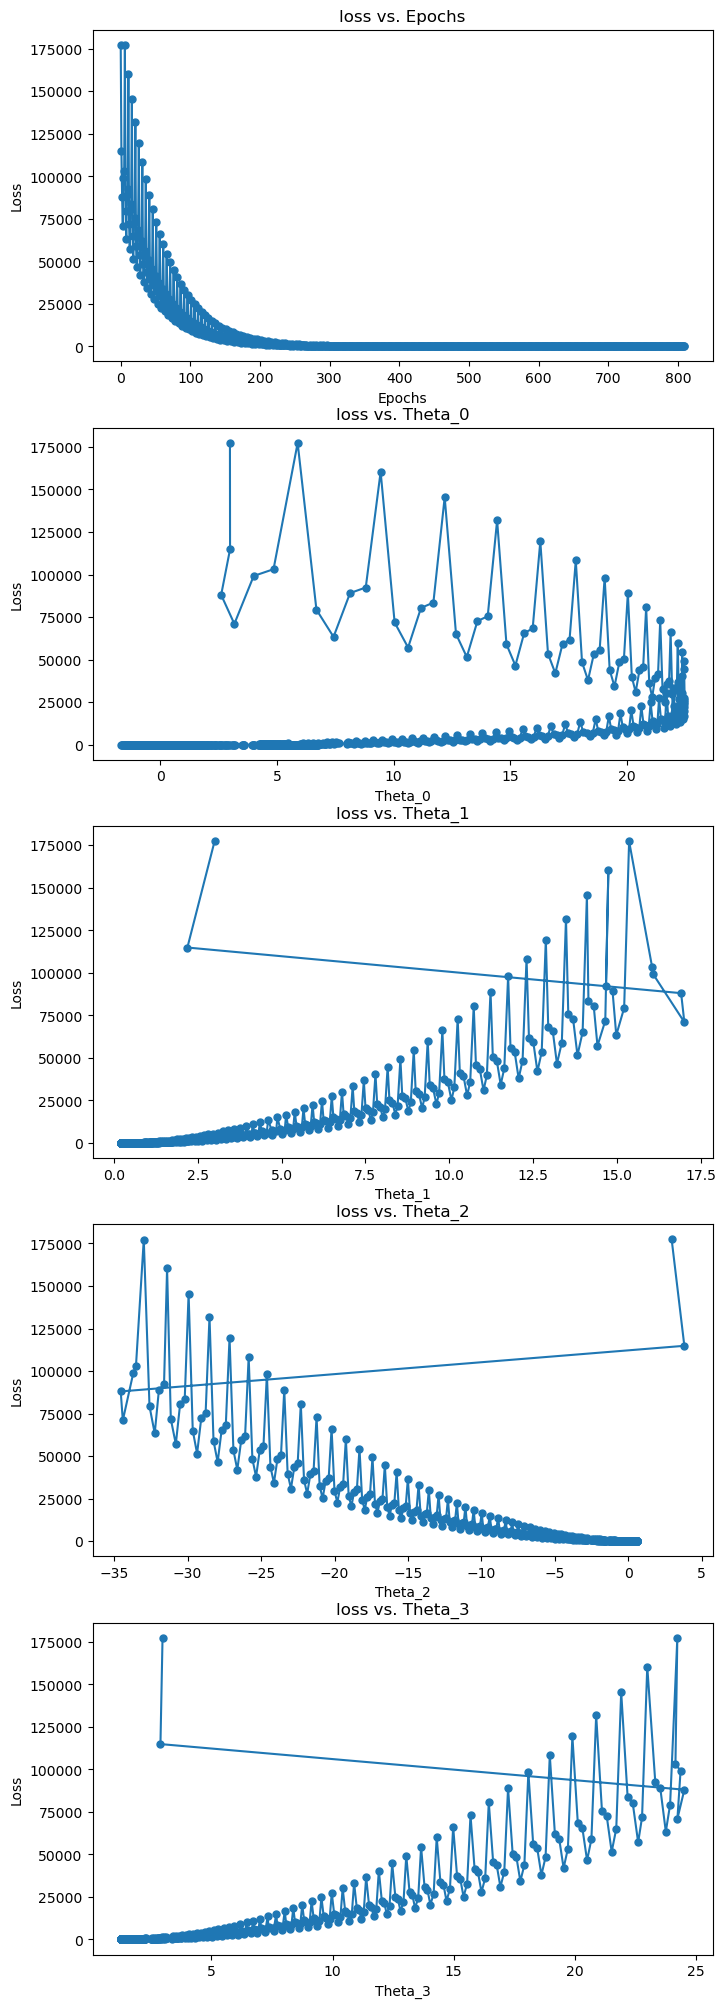

In [128]:
plots(loss, theta_0, theta_1, theta_2, theta_3, X, y)

# Conclusion 

In [169]:
from tabulate import tabulate

adam_results = [[adam_epoch_no, adam_norm, adam_theta_vec, adam_loss[-1]]]
bfgs_results = [[BFGS_epoch_no, BFGS_norm, BFGS_theta_vec, BFGS_loss[-1]]]

headers = ["Optimizer", "Iterations", "Norm", "Optimal Theta", "Loss Value"]

results = [("Adam", *adam_results[0]), ("BFGS", *bfgs_results[0])]

print(tabulate(results, headers=headers))

Optimizer      Iterations     Norm  Optimal Theta      Loss Value
-----------  ------------  -------  ---------------  ------------
Adam                   38  228.174  [[0.67607842]        12.9213
                                     [0.67090056]
                                     [0.66977989]
                                     [0.67646645]]
BFGS                  161  129.441  [[-1.46999006]        4.19587
                                     [ 0.22097913]
                                     [ 0.55397987]
                                     [ 1.26070613]]


### As we can see in the table:
### - Adam faster and more stable than BFGS
### - however BFGS converge to a better solution (smaller loss value and smaller gradient norm)